<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** 1 pársec = 206265 ua = 3,0857x10^16 metros, por lo tanto, 1 kiloparsec = 3,0857x10^19 metros. Luego, sabiendo que el diametro de la tierra es es aproximadamente D = 12742000 metros, kilopársec/D = 2,4217x10^12 es la cantidad de tierras que caben dentro de un kilopársec.

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m =  3.0857e19 # rellene con el valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg

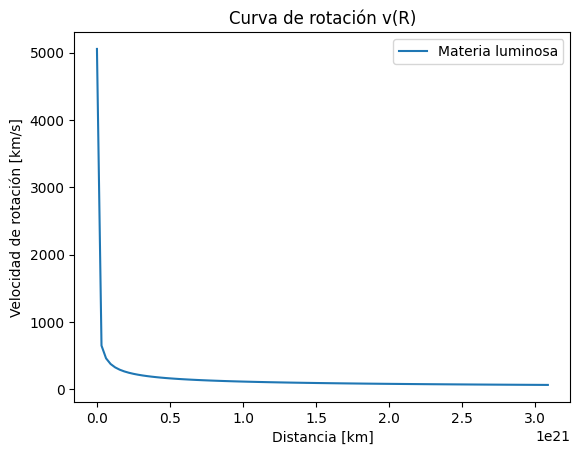

In [9]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (1)

def M_star(R, M_1, R_1):
  return M_1*(1-((np.exp(-R/R_1)*(R_1 + R))/R_1))

# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M1, R1):
  return np.sqrt(G*M_star(R, M1, R1)/R)/1000 # Conversión metros por segundo a kilometro por segundo.

# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01, 100 + 0.01, 100)
R_m = R * kpc_to_m

# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
v_r_stars = v_R_stars(R_m ,solar_masses_to_kg*10e10 ,5*kpc_to_m/1000)

# Haga el gráfico :
# No olvide en cada eje indicar las unidades.
plt.plot(R_m, v_r_stars, label = 'Materia luminosa')

plt.title('Curva de rotación v(R)')
plt.ylabel('Velocidad de rotación [km/s]')
plt.xlabel('Distancia [km]')
plt.legend()

plt.show()

3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:**


 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


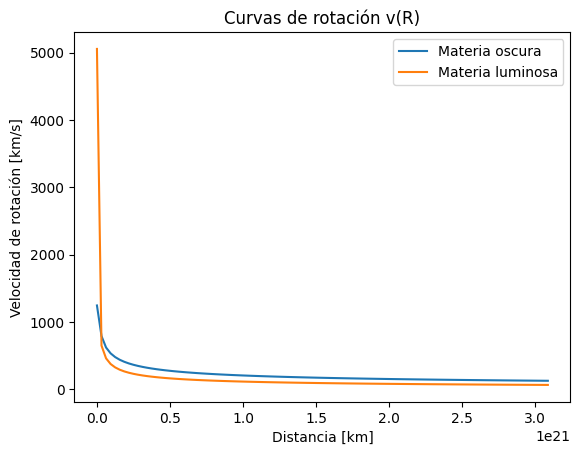

In [10]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
def M_dm(R, M0, R0):
  return M0*(np.log((R0+R)/R0)+R0/(R0+R)-1)

# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
def v_R_dm(R, M0, R0):
  return np.sqrt(G*M_dm(R, M0, R0)/R)/1000

# Utilice el mismo arreglo R de la parte anterior.
# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

#v_r_stars =
v_r_dm = v_R_dm(R_m, solar_masses_to_kg*5e10,20*kpc_to_m/1000)

# Gráfico:
plt.plot(R_m, v_r_dm, label = 'Materia oscura')
plt.plot(R_m, v_r_stars, label = 'Materia luminosa')

plt.title('Curvas de rotación v(R)')
plt.ylabel('Velocidad de rotación [km/s]')
plt.xlabel('Distancia [km]')
plt.legend()

plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):**

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [11]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/Módulo/velocity_curve_NGC6503.txt'
datos = np.loadtxt(path_archivo)

datos

array([[  0.67212755,  86.72566372,  10.17699115],
       [  1.40111899, 104.6460177 ,   5.08849558],
       [  2.05642507, 111.72566372,   1.7699115 ],
       [  2.75232209, 119.69026549,   1.7699115 ],
       [  3.53506911, 122.56637168,   1.99115044],
       [  4.23754845, 122.56637168,   1.7699115 ],
       [  4.98464126, 118.5840708 ,   1.99115044],
       [  5.68803481, 117.47787611,   1.99115044],
       [  6.34919184, 117.47787611,   1.7699115 ],
       [  7.09299349, 117.47787611,   1.7699115 ],
       [  7.79656988, 116.15044248,   1.32743363],
       [  8.54055438, 115.92920354,   0.88495575],
       [  9.15947488, 117.03539823,   1.10619469],
       [  9.90291085, 117.47787611,   0.44247788],
       [ 10.60520734, 117.69911504,   1.10619469],
       [ 11.3894171 , 118.80530973,   0.66371681],
       [ 12.09262781, 117.92035398,   0.88495575],
       [ 12.75415052, 117.47787611,   1.99115044],
       [ 13.41658744, 115.92920354,   1.32743363],
       [ 14.15910919, 117.47787

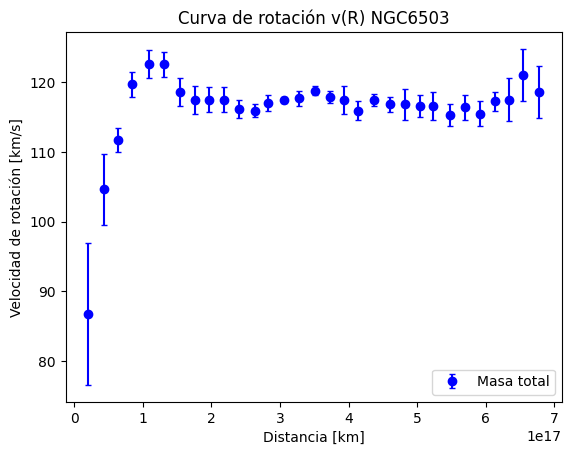

In [37]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.

# Extracción de columnas
distancia_kpc = datos[:,0]
distancia_km = kpc_to_m*distancia_kpc/1000
velocidad = datos[:, 1]
error = datos[:, 2]

# Curva de rotación incluyendo barras de error
plt.errorbar(distancia_km, velocidad, yerr = error, capsize = 2.5, color = 'blue', label = 'Masa total', linestyle='None', fmt='o')

plt.xlabel('Distancia [km]')
plt.ylabel('Velocidad de rotación [km/s]')
plt.title('Curva de rotación v(R) NGC6503')
plt.legend()

plt.show()


Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):**  No lineal

In [16]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [40]:
# Escriba la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).
# Hint: puede directamente construir esta ecuación con v_R_dm y v_R_stars, le puede ahorrar errores.

def v_R_tot(R, M0, R0, M1, R1):
  return v_R_dm(R, M0, R0) + v_R_stars(R, M1, R1)

# Utilice curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Para las condiciones iniciales, considere masas entre 1e10 a 1e11 masas solares, y radios entre 1 a 20 kpc.
# Rellene según corresponda, ignore las variables "pcov"

cond_i = np.array([5e10*solar_masses_to_kg, 10*kpc_to_m])

popt_stars, pcov_stars = curve_fit(v_R_stars, distancia_km, velocidad, p0=cond_i)

popt_dm, pcov_dm = curve_fit(v_R_dm, distancia_km, velocidad, p0=cond_i)

popt_tot, pcov_tot = curve_fit(v_R_tot, distancia_km, velocidad, p0=cond_i)

<ipython-input-10-f385452e0a52>:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(G*M_dm(R, M0, R0)/R)/1000


TypeError: v_R_tot() missing 2 required positional arguments: 'M1' and 'R1'

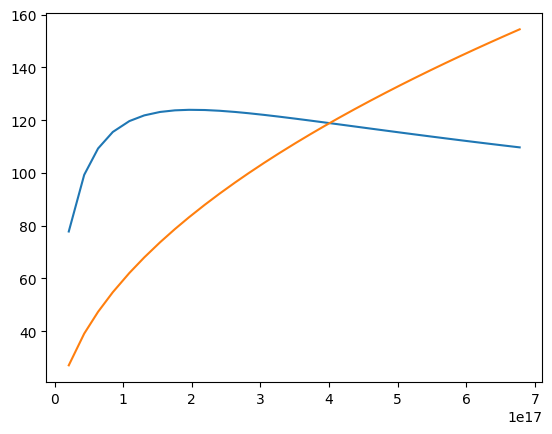

In [39]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.
x,y = popt_dm
x1, y1 = popt_stars

plt.plot(distancia_km, v_R_dm(distancia_km, x, y))
plt.plot(distancia_km, v_R_stars(distancia_km, x1, y1))

Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [ ]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i
pred_tot = v_R_tot()
pred_dm = v_R_dm()
pred_stars = v_R_stars()

# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred):
  pass

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado())
print('Chi-cuadrado (dm-only): ', chi_cuadrado())
print('Chi-cuadrado (stars-only): ', chi_cuadrado())

**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?
2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [51]:
#np.random.seed(123)  # investigue que hace esta línea de código

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?  

**Respuesta**  
Lo que hace la línea de código anterior es establecer una semilla que commience en 123, de tal manera que cualquier operación que genere números aleatorios después de establecer la semilla producirá los mismos resultados. Es una buena practica pues así se permite que el experimento pueda ser replicado exactamente por cualquier otra persona.

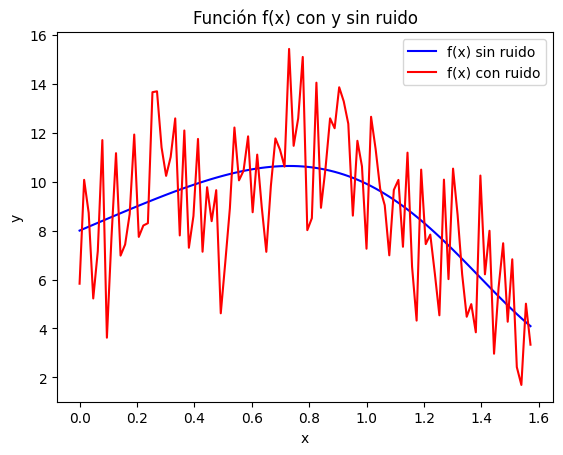

In [57]:
np.random.seed(123) # La puse de nuevo aquí :)

N_data = 100
x = np.linspace(0,np.pi/2, N_data)

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
y_real = 5*np.sin(x) + 5*np.cos(x**2) + 3

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

y_ruido = np.random.normal(loc = 0, scale = 2, size = N_data) + y_real

# Visualice sus datos :)
# Puede graficar la función sin ruido si así lo desea. (opcional)

plt.plot(x, y_real, color = 'blue', label = 'f(x) sin ruido')
plt.plot(x, y_ruido, color = 'red', label = 'f(x) con ruido')
plt.title('Función f(x) con y sin ruido')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [60]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [61]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 100 # puede cambiar este valor si lo desea
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [66]:
for i in range(100):
  x_train,x_test,y_train,y_test = train_test_split(x, y_ruido, train_size=0.75)

  for j in range(10):
    poly = PolynomialFeatures(1+j, include_bias = True)
    poly_features = poly.fit_transform(x_train.reshape(-1, 1))
    poly_test = poly.fit_transform(x_test.reshape(-1,1))
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y_train)
    y_predicted = poly_reg_model.predict(poly_test)

    errores_modelos[j,i] = mean_squared_error(y_test, y_predicted)

Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

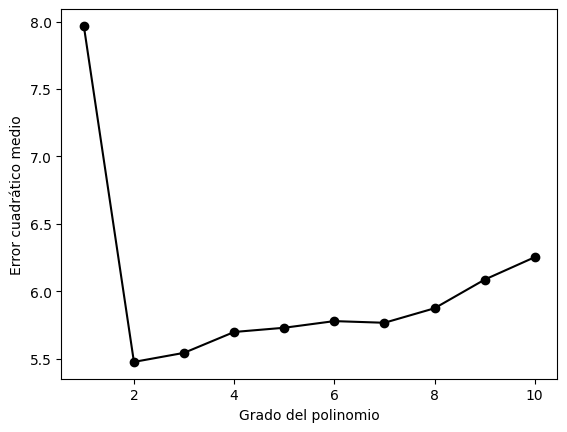

In [69]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?

# Respuesta: El parametro axis=1 calcula el promedio a lo largo de las columnas, devuelve un array de los promedios de cada una de las filas.

# Añada su gráfico.

promedio_modelos =  np.mean(errores_modelos, axis=1)
plt.plot(np.arange(1,11), promedio_modelos, 'o-', color='black')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')

plt.show()

El grado óptimo del polinomio es 2!